<a href="https://colab.research.google.com/github/kinba09/LGMVIP-DataScience/blob/main/NeuralNetworkThatCanReadHandwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

<Axes: ylabel='count'>

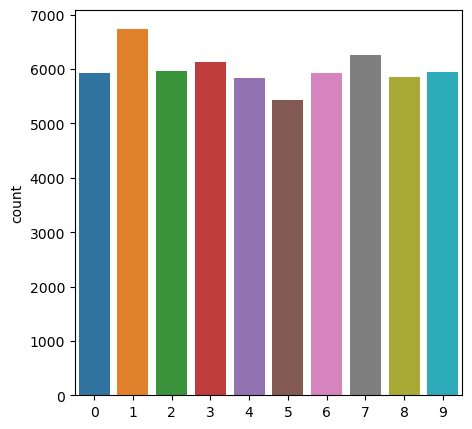

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x=y_train)

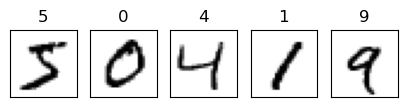

In [ ]:
fig, axes = plt.subplots(ncols=5, sharex=False,
    sharey=True, figsize=(5, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
modready=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 621s 367ms/step - loss: 0.0414 - accuracy: 0.9879 - val_loss: 0.1417 - val_accuracy: 0.9840
Epoch 2/10
1688/1688 [==============================] - 687s 407ms/step - loss: 0.0383 - accuracy: 0.9887 - val_loss: 0.0828 - val_accuracy: 0.9897
Epoch 3/10
1688/1688 [==============================] - 662s 392ms/step - loss: 0.0332 - accuracy: 0.9902 - val_loss: 0.0938 - val_accuracy: 0.9877
Epoch 4/10
1688/1688 [==============================] - 617s 366ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0961 - val_accuracy: 0.9877
Epoch 5/10
1688/1688 [==============================] - 2207s 1s/step - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0659 - val_accuracy: 0.9912
Epoch 6/10
1688/1688 [==============================] - 669s 396ms/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.1221 - val_accuracy: 0.9853
Epoch 7/10
1688/1688 [==============================] - 633s 375ms/step - loss: 0.0278 - accuracy: 0.9917 - val_lo

In [ ]:
model.save('lgm.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('lgm.h5')

In [ ]:
loss_n_accuracy=model.evaluate(x_test,y_test)
print("Test Loss", loss_n_accuracy[0])
print("Test Accuracy", loss_n_accuracy[1])

313/313 [==============================] - 18s 57ms/step - loss: 2.4104 - accuracy: 0.9920
Test Loss 2.4103622436523438
Test Accuracy 0.9919999837875366


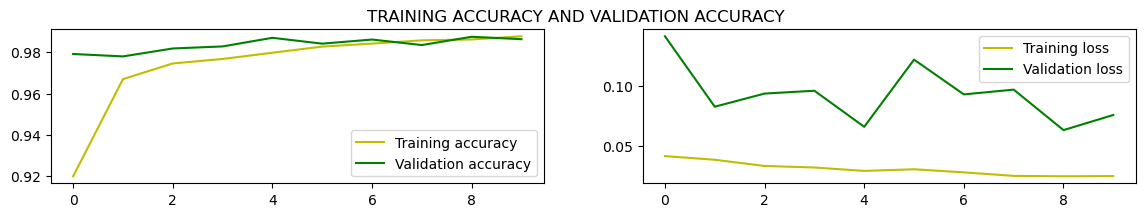

In [ ]:
accuracy = modready.history['accuracy']
valid_acc = modready.history['val_accuracy']
Loss = modready.history['loss']
valid_Loss = modready.history['val_loss']
Epochs = range(len(acc))

fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(14,2))
ax[0].plot(Epochs, acc, 'y', label='Training accuracy')
ax[0].plot(Epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(Epochs, Loss, 'y', label='Training loss')
ax[1].plot(Epochs, valid_Loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('TRAINING ACCURACY AND VALIDATION ACCURACY')
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

313/313 [==============================] - 14s 45ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    1,    0,    0,    0,    1,    1,    3,    0],
       [   0, 1128,    1,    0,    1,    1,    2,    2,    0,    0],
       [   1,    1, 1026,    0,    1,    0,    0,    3,    0,    0],
       [   0,    0,    3, 1002,    0,    4,    0,    0,    1,    0],
       [   0,    0,    0,    0,  979,    0,    0,    0,    1,    2],
       [   0,    0,    0,    5,    0,  884,    3,    0,    0,    0],
       [   2,    1,    0,    0,    2,    4,  948,    0,    1,    0],
       [   0,    0,    8,    1,    0,    1,    0, 1015,    1,    2],
       [   0,    0,    1,    1,    0,    0,    0,    1,  970,    1],
       [   0,    0,    1,    1,    6,    4,    0,    2,    1,  994]])>

Text(70.72222222222221, 0.5, 'Truth')

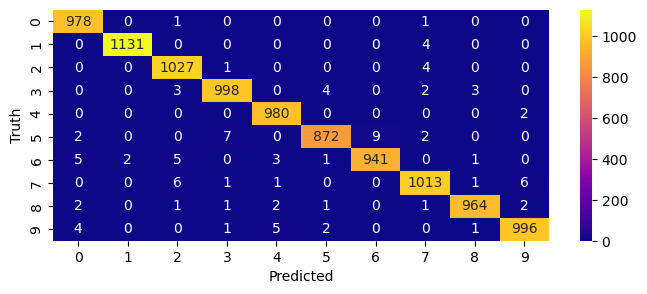

In [ ]:
plt.figure(figsize = (8,3))
sns.heatmap(cm,annot=True,fmt='d',cmap='plasma')
plt.xlabel('Predicted')
plt.ylabel('Truth')

313/313 [==============================] - 21s 66ms/step
Predicted Value:  9
Successful prediction


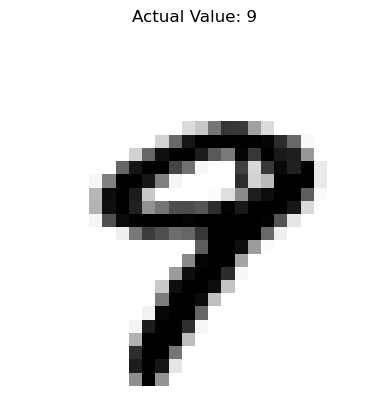

In [ ]:
plt.imshow(x_test[9],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[9]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[9]))
if(y_test[9]==(np.argmax(prediction[9]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 23s 73ms/step
Predicted Value:  5
Unsuccessful prediction


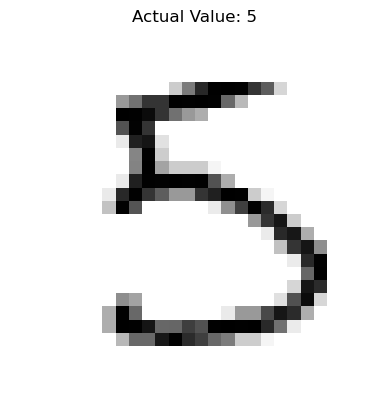

In [ ]:
plt.imshow(x_test[15],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[15]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[15]))
if(y_test[11]==(np.argmax(prediction[15]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 10s 31ms/step
Predicted Value:  9
Successful prediction


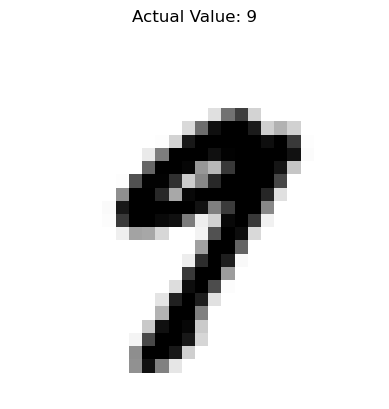

In [ ]:
plt.imshow(x_test[20],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[20]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[20]))
if(y_test[20]==(np.argmax(prediction[20]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')